Over to **Pandas**, a super critical component for *actually* doing data science (**P0** Skill)

**Data Structures**

There are 3 main data structures:
> **Series** objects. Similar to !D array or Python lists. Have the value and the index

> **Dataframe** objects. work like a 2D table in many ways

> **Panel** objects. A disctionary of data-frames. Are not used often

In [5]:
"""
Series objects behave much like one-dimensional NumPy arrays
"""

import pandas as pd

s = pd.Series([2,-1,3,5])
print(s)

#Trying to index elements
print(s[0],'\n') #as expected
print(s[0:2],'\n') #as expected


0    2
1   -1
2    3
3    5
dtype: int64
2 

0    2
1   -1
dtype: int64 



In [22]:
"""
Math Operations with Series
"""

#Iterating through series
for i in s:
    print(i) #this works

#operation on the entire set
print('\n',s + 99,'\n') #This also works

#boolean
print(s > 0,'\n')

#adding a list
print(s + [10,20,30,40],'\n')

#checccking for an element
print(s,'\n')


2
-1
3
5

 0    101
1     98
2    102
3    104
dtype: int64 

0     True
1    False
2     True
3     True
dtype: bool 

0    12
1    19
2    33
3    45
dtype: int64 

0    2
1   -1
2    3
3    5
dtype: int64 



True

In [27]:
#It is possible to explictly assign labels
s1 = pd.Series([2,-1,3,5], index = ["a","b","c","d"])
print(s1,'\n')

#referencing elements - works as a dictionary and a list 
print(s1['b'],'\n')
print(s1[1],'\n')

#tryng to mte
s1['b'] =100

print(s1,'\n') #it works

a    2
b   -1
c    3
d    5
dtype: int64 

-1 

-1 

a      2
b    100
c      3
d      5
dtype: int64 



In [31]:
"""
Series == "recommended" way of accessing elements
"""

#use loc for labels and iloc for integer index - IMPORTANT
s1.loc["a"]
s1.iloc[2]

3

In [41]:
"""
Creating a series object from a dictionary
"""

weights = {"alice":25,"bob":30,"cal": 80, "dal":90}

s3 = pd.Series(weights)
print(s3,'\n')

s4 = pd.Series(weights, index = ["alice","dal"])
print(s4,'\n') #only the ones pertaining to the index

s5 = pd.Series(weights, index = ["apple","dal","daisy"])
print(s5,'\n') #makes sense

s6 = s3 + s5 #curious to know what happens
print(s6,'\n') #try - best to be safe with this


alice    25
bob      30
cal      80
dal      90
dtype: int64 

alice    25
dal      90
dtype: int64 

apple     NaN
dal      90.0
daisy     NaN
dtype: float64 

alice      NaN
apple      NaN
bob        NaN
cal        NaN
daisy      NaN
dal      180.0
dtype: float64 



In [44]:
# scalar objects be assigned a name

s7 = pd.Series([18,20,24],index = ["a","b","c"], name = "marks")
print(s7,'\n')

a    18
b    20
c    24
Name: marks, dtype: int64 



In [56]:
"""
Based on my experience, I know that handling "time varables" is 
something that keeps coming up, again and again
"""
dates = pd.date_range('2016/10/29 5:30pm',periods = 12, freq = 'H')
print(dates,'\n',type(dates))

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]

#a Series with temeratures and dates as index
temp_series = pd.Series(temperatures, index = dates)
print('\n',temp_series,'\n')

#This makes sense and is useful

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H') 
 <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

 2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64 



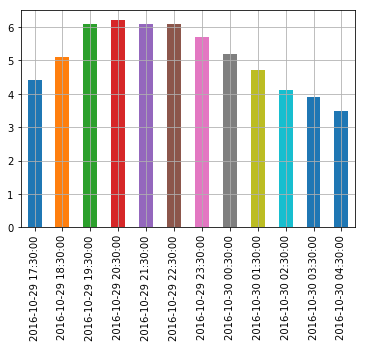

In [60]:
#Plotting series - its actually quite simple to do this
import matplotlib 
import matplotlib.pyplot as plt

temp_series.plot(kind = "bar")
plt.grid()
plt.show()

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0] 

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64 



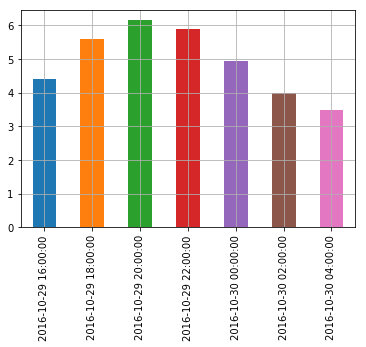

In [66]:
"""
Resampling
"""

temp_series_2H = temp_series.resample("2H") #resampling "rate" is estab.
print(temp_series_2H,'\n') 
temp_series_2H = temp_series_2H. mean() #Actual 'mean' resampling
print(temp_series_2H,'\n')

#plotting this
temp_series_2H.plot(kind = "bar")
plt.grid()
plt.show()

#Looks great, shall revisit this

In [68]:
# Other examples of resampling
import numpy as np

temp_series_2H = temp_series.resample("2H").apply(np.min) #apply method 
print(temp_series_2H,'\n')

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64 



In [75]:
# We can similarly try upsampling, but it obv. creates "holes" in the data
temp_series_15M = temp_series.resample("45Min")
print(temp_series_15M,'\n') # as always doesn't print anything

temp_series_15M = temp_series_15M.apply(np.mean)
print(temp_series_15M,'\n')

#head displays the top X rows
print(temp_series_15M.head(n=5),'\n')

#This is all great, I hope that I don't forget this

DatetimeIndexResampler [freq=<45 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0] 

2016-10-29 17:15:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 20:15:00    6.2
2016-10-29 21:00:00    6.1
2016-10-29 21:45:00    NaN
2016-10-29 22:30:00    6.1
2016-10-29 23:15:00    5.7
2016-10-30 00:00:00    5.2
2016-10-30 00:45:00    NaN
2016-10-30 01:30:00    4.7
2016-10-30 02:15:00    4.1
2016-10-30 03:00:00    3.9
2016-10-30 03:45:00    NaN
2016-10-30 04:30:00    3.5
Freq: 45T, dtype: float64 

2016-10-29 17:15:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 20:15:00    6.2
Freq: 45T, dtype: float64 



In [76]:
"""
EXTENDED DISCUSSIONS ON TIMEZONES
"""

#WILL GET TO THIS LATER....
#TBD
#TBD

'\nEXTENDED DISCUSSIONS ON TIMEZONES\n'

In [81]:
"""
Time Periods, etc.
"""

#exploring the period_range function after having explored date_range

quarters = pd.period_range('2016Q1', periods = 8, freq = 'Q')
print(quarters,'\n')

#its possible to offset the time
print(quarters + 4,'\n') # 4 quarters

#a few other functions for zooming in and out of spreadsheets - asfreq()

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC') 

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
             '2018Q3', '2018Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC') 



In [82]:
"""
DataFrame Objects that mimic spreadsheets
Really excited to be learning this, this is the heart of it all

"""

'\nDataFrame Objects that mimic spreadsheets\nReally excited to be learning this, this is the heart of it all\n\n'

In [93]:
"""
Creating a data-frame.

Series Objects -> Dictionary -> DataFrame

"""

people_dict = {
    "weight": pd.Series([68,83,112], index = ["alice","bob","charles"]),
    "birthyear": pd.Series([1985,1984,1992], index = ["alice","bob","charles"], name = "year"),
    "children": pd.Series([0,3], index = ["charles","bob"]),
    "hobby": pd.Series(["Biking","Dancing"], index = ["alice","bob"])
}

people = pd.DataFrame(people_dict)

print(people,'\n')

people #the data frame gets printed in a much nicer way

         weight  birthyear  children    hobby
alice        68       1985       NaN   Biking
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN 



,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


**Summarizing** key points:
* Created a data frame by using a dictionary
* Each 'column' of the data-frame was entered as a Series object
* Data Frames are displayed really well in Jupyter nb, much nicer than in Spyder
* Columns are returned as Series objects

In [94]:
#Extracting information from data Frames

print(people['birthyear'],'\n')

print(type(people['birthyear']),'\n') #This is a Series data type -- important to know

#Getting multiple columns
people[["birthyear", "hobby"]] #note the double square brackets


alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64 

<class 'pandas.core.series.Series'> 



,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [96]:
# a way to sub-set the data frames by specifying columns and index

d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [97]:
#creating a data frame from a list of lists
#the column labels and the row indexes are specified separately

values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [98]:
"""
Multi-indexing; this means tables that have multiple levels 
of rows or columns
"""

#skipping this in the first pass, shall do this later...
# This is however imp. from a exploratory analysis POV

'\nMulti-indexing; this means tables that have multiple levels of rows or columns\n'

In [104]:
#Accessing rows in a data frame

people

people.loc["charles"] #note the .loc thing

#possible to access by index as well
people.iloc[2] #note that its iloc when accessing by the index

people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [118]:
#accessing data that meet certain crieria

print(people,'\n')

#people with weight > 90
people[people['weight']>90] # This is somewhat a complicated rep.

# weight>70 and born in the 80s
people[(people['weight']>70) & (people['birthyear']< 1990)] #works :-)


         weight  birthyear  children    hobby
alice        68       1985       NaN   Biking
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN 



,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing


In [142]:
#adding and deleting columns in a data-frame
people['age'] = 2019 - people['birthyear'] 
print(people,'\n')

people['over30'] = people['age'] >30
print(people,'\n')

people['random'] = 1
print(people,'\n')

del people['random']
print(people,'\n')

people['rank'] = range(1,4,1)  #wow, this works
print(people,'\n')

# insert; can be used to add columns at a desired index
people.insert(1,"height2",[172,181,190])
print(people,'\n')

         weight  height  birthyear  children    hobby  age  over30  rank
alice        68     172       1985       NaN   Biking   34    True     1
bob          83     181       1984       3.0  Dancing   35    True     2
charles     112     190       1992       0.0      NaN   27   False     3 

         weight  height  birthyear  children    hobby  age  over30  rank
alice        68     172       1985       NaN   Biking   34    True     1
bob          83     181       1984       3.0  Dancing   35    True     2
charles     112     190       1992       0.0      NaN   27   False     3 

         weight  height  birthyear  children    hobby  age  over30  rank  \
alice        68     172       1985       NaN   Biking   34    True     1   
bob          83     181       1984       3.0  Dancing   35    True     2   
charles     112     190       1992       0.0      NaN   27   False     3   

         random  
alice         1  
bob           1  
charles       1   

         weight  height  birthyea

In [147]:
# creating columns and derived data-frames, using assign()
#assign returns a data frame - doesn't modify the parent one

people3 = people.assign (
    BMI = 0,
    has_pets = 1

)

people3



,weight,height2,height,birthyear,children,hobby,age,over30,rank,BMI,has_pets
alice,68,172,172,1985,NaN,Biking,34,True,1,0,1
bob,83,181,181,1984,3.0,Dancing,35,True,2,0,1
charles,112,190,190,1992,0.0,NaN,27,False,3,0,1


In [153]:
# Evaluating an expression - THIS IS VERY USEFUL

people3.eval("weight >70") #very cool. It doesn't mutate the data-frame
people3

people3.eval("gundu_buskoo = weight >70") #returns a df; doesn't mutate
people3

people3.eval("gundu_buskoo = weight >70",inplace = True) #mutates; IMP
people3

#this is a very important thing, helps me do a lot with df

,weight,height2,height,birthyear,children,hobby,age,over30,rank,BMI,has_pets,gundu_buskoo
alice,68,172,172,1985,NaN,Biking,34,True,1,0,1,False
bob,83,181,181,1984,3.0,Dancing,35,True,2,0,1,True
charles,112,190,190,1992,0.0,NaN,27,False,3,0,1,True


In [159]:
# Querying a data frame - another very important topic
people4 = people3.query("weight <90 and age <35") #it works

people4

,weight,height2,height,birthyear,children,hobby,age,over30,rank,BMI,has_pets,gundu_buskoo
alice,68,172,172,1985,NaN,Biking,34,True,1,0,1,False


In [161]:
#Sorting a dataframe

people3.sort_values(by="age", inplace=True) #inplace = yes mutates the df
people3


,weight,height2,height,birthyear,children,hobby,age,over30,rank,BMI,has_pets,gundu_buskoo
charles,112,190,190,1992,0.0,NaN,27,False,3,0,1,True
alice,68,172,172,1985,NaN,Biking,34,True,1,0,1,False
bob,83,181,181,1984,3.0,Dancing,35,True,2,0,1,True


**Happy to have covered a reasonable ground**
**Well Done :)**

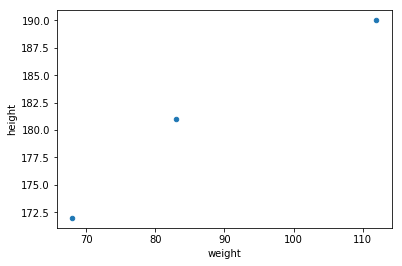

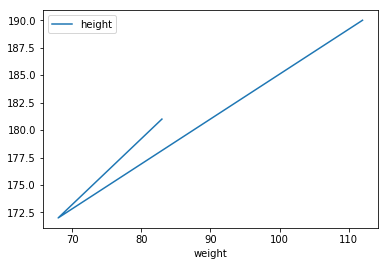

In [166]:
#Plotting a data-frame, very important from data exploration POV
people3.plot(kind = "scatter", x = "weight",y = "height")
plt.show()

people3.plot(kind = "line", x = "weight",y = "height" )
plt.show()


In [176]:
"""
Creating a data frame using an NumPy array
"""

grades_array = np.array([[8,8,9],[10,9,9],[4,8,2],[9,10,10]])
type(grades_array)
grades_array.shape

grades = pd.DataFrame(
    grades_array,
    columns = ["sep","oct","nov"],
    index = ["alice","bob","charles","darwin"]
)

print(grades,'\n') # grades


#some numPy math functions on this data frame
np.sqrt (grades) # works
grades + 1 #works, does not mutate
print(grades > 5,'\n') #works

         sep  oct  nov
alice      8    8    9
bob       10    9    9
charles    4    8    2
darwin     9   10   10 

           sep   oct    nov
alice     True  True   True
bob       True  True   True
charles  False  True  False
darwin    True  True   True 



In [180]:
#columnwise and table-wise operations

print(grades['sep'].mean()) #great
print('\n')
type(grades['sep'].mean())

print(grades.mean()) #these aggregation functions return a series object

7.75


sep    7.75
oct    8.75
nov    7.50
dtype: float64


In [182]:
# Column-wise and Row-wise operations
(grades > 5).all() #by default this is columnwise

sep    False
oct     True
nov    False
dtype: bool

In [184]:
# Column-wise and Row-wise operations
(grades > 5).all(axis=1) #row-wise version

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [186]:
#now this makes it easy for normalization and feature scaling = VERY IMP
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


In [187]:
"""
Automatic Alignment: Skipping this topic
"""

#TBD
#TBD

'\nAutomatic Alignment: Skipping this topic\n'

In [194]:
"""
Handling Missing Data: Extremely Important
"""

#data frame preprocessing
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

grades3 = grades + bonus_points

print(grades3,'\n')


#Approach 1 - replace na by a value
grades3.fillna(0)

#Approach 2a - interpolate vertically (columnwise)
grades3.interpolate(axis =0)

#Approach 2a - interpolate horizontally (row-wise)
grades3.interpolate(axis =1) #it works - this is very imp


         dec   nov   oct  sep
alice    NaN   NaN   NaN  NaN
bob      NaN   NaN   9.0  NaN
charles  NaN   5.0  11.0  NaN
colin    NaN   NaN   NaN  NaN
darwin   NaN  11.0  10.0  NaN 



,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,9.0
charles,NaN,5.0,11.0,11.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,10.0


In [195]:
"""
More use cases for interpolate
"""

#TBD
#TBD

In [206]:
"""
Group by Functionality : VERY IMP
"""

grades

grades["hobby"] = ["biking","dancing",np.nan,"dancing"]

grades

grouped_grades = grades.groupby("hobby")

grouped_grades #IMP: this doesn't print anything, its a template

grouped_grades.mean()

,sep,oct,nov
hobby,,,
biking,8.0,8.0,9.0
dancing,9.5,9.5,9.5


In [217]:
"""
Pivot Tables in Pandas
"""

#creating a DF for Pivot analysis
grades

#example 1
#still unable to figure tis out, fuck it

,sep,oct,nov,hobby
alice,8,8,9,biking
bob,10,9,9,dancing
charles,4,8,2,NaN
darwin,9,10,10,dancing


In [218]:
"""
Overview Functions eg. head, summary -- IMP
"""

"""
List:
    - large_df.head() #first 5
    - large_df.tail(n = 4) #last 4
    - large_df.info() #information on all the columns
    - large_df.describe() #summary statistics for each column  
"""

'\nList:\n    - large_df.head() #first 5\n    - large_df.tail(n = 4) #last 4\n    - large_df.info() #information on all the columns\n    - large_df.describe() #summary statistics for each column  \n'

In [219]:
"""
Saving and Loading Data Frames -- NEEDED
"""

#TBD
#TBD

'\nSaving and Loading Data Frames -- NEEDED\n'

In [222]:
"""
Combining Data Frames -- VERY IMP
"""

"""
Merge or Join
  - pd.merge(left=city_loc, right=city_pop, on="city")
  - all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
  - pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")
"""

#the 3rd case above is imp, when columns have diff names in diff tables

"""
Use pd.concat for concatenation
"""

'\nUse pd.concat for concatenation\n'

In [221]:
"""
Handling Categorical Variables -- VERY IMP
"""

#TBD
#TBD

'\nHandling Categorical Variables -- NEEDED\n'